In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apartamentos-venda-na-cidade-de-sao-paulo-sp/dados_wgs.xlsx


![](https://miro.medium.com/v2/resize:fit:837/1*tI-TWV--K05xbXUgA4Qm1w.png)

In [2]:
!ls /kaggle

input  lib  src  working


In [3]:
!ls /kaggle/input

apartamentos-venda-na-cidade-de-sao-paulo-sp


In [4]:
!ls /kaggle/input/apartamentos-venda-na-cidade-de-sao-paulo-sp

dados_wgs.xlsx


<h1 style='color:#552b95'>Dataset apartamentos à vendas na cidade de São Paulo</h1>

In [5]:
# Lendo conjunto de dados

df = pd.read_excel('/kaggle/input/apartamentos-venda-na-cidade-de-sao-paulo-sp/dados_wgs.xlsx')

In [6]:
# Verificando as primeiras linhas do dataframe

df.head()

,id,valor_total,unit,area_util,quartos,vagas,condominio,suites,banheiros,piscina,...,qtd_dados_bairro,media_idh,media_gini,expectativa_vida,renda_percapita,estacao_prox,linha_prox,dist,lat,lon
0,526,189900,5934.38,32,2,1,180.0,0,1,0,...,36.0,0.697182,0.410909,72.751818,559.668182,SÃO MATEUS,PRATA,6822.823684,-23.583879,-46.417548
1,734,221110,5142.09,43,2,1,250.0,0,1,0,...,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.709841,-23.543535,-46.425492
2,738,219990,5116.05,43,1,1,300.0,0,1,1,...,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123,-23.537339,-46.426823
3,753,219990,5116.05,43,2,1,300.0,0,1,1,...,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123,-23.537339,-46.426823
4,924,220000,5365.85,41,2,1,300.0,0,1,1,...,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.918703,-23.557799,-46.443523


In [7]:
# Colunas do dataframe

for i in df.columns:
    print(i)

id
valor_total
unit
area_util
quartos
vagas
condominio
suites
banheiros
piscina
academia
quadra
endereco
link
bairro
media_bairro
qtd_dados_bairro
media_idh
media_gini
expectativa_vida
renda_percapita
estacao_prox
linha_prox
dist
lat
lon


In [8]:
# Quantidade de linhas do dataframe

len(df)

2499

In [9]:
# Quantidade de linhas e colunas do dataframe

df.shape

(2499, 26)

In [10]:
# Tipos das variáveis

df.dtypes

id                    int64
valor_total           int64
unit                float64
area_util             int64
quartos               int64
vagas                 int64
condominio          float64
suites                int64
banheiros             int64
piscina               int64
academia              int64
quadra                int64
endereco             object
link                 object
bairro               object
media_bairro        float64
qtd_dados_bairro    float64
media_idh           float64
media_gini          float64
expectativa_vida    float64
renda_percapita     float64
estacao_prox         object
linha_prox           object
dist                float64
lat                 float64
lon                 float64
dtype: object

In [11]:
# Sumarização dos dados

# Sinônimo de sumarizar
# resumir, abreviar, compendiar, condensar, epilogar, recapitular, sumariar, reunir, juntar, agrupar, 
# concentrar, consubstanciar, substanciar, fundir, recopilar, simplificar, epitomar.

round(df.describe(), 0)

,id,valor_total,unit,area_util,quartos,vagas,condominio,suites,banheiros,piscina,...,quadra,media_bairro,qtd_dados_bairro,media_idh,media_gini,expectativa_vida,renda_percapita,dist,lat,lon
count,2499.0,2499.0,2499.0,2499.0,2499.0,2499.0,2264.0,2499.0,2499.0,2499.0,...,2499.0,2492.0,2492.0,2499.0,2499.0,2499.0,2499.0,2499.0,2499.0,2499.0
mean,1290.0,548085.0,7144.0,71.0,2.0,1.0,1720.0,1.0,2.0,0.0,...,0.0,7051.0,22.0,1.0,0.0,77.0,1584.0,2851.0,-24.0,-47.0
std,741.0,554449.0,2886.0,45.0,1.0,1.0,28049.0,1.0,1.0,0.0,...,0.0,2090.0,10.0,0.0,0.0,2.0,1109.0,2741.0,0.0,0.0
min,1.0,80000.0,1068.0,22.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,3079.0,1.0,1.0,0.0,72.0,523.0,31.0,-24.0,-47.0
25%,650.0,265000.0,5088.0,49.0,2.0,1.0,350.0,0.0,1.0,0.0,...,0.0,5317.0,15.0,1.0,0.0,75.0,863.0,926.0,-24.0,-47.0
50%,1292.0,380000.0,6491.0,60.0,2.0,1.0,486.0,0.0,1.0,0.0,...,0.0,6680.0,21.0,1.0,0.0,77.0,1243.0,2030.0,-24.0,-47.0
75%,1932.0,598500.0,8488.0,74.0,3.0,1.0,650.0,1.0,2.0,1.0,...,1.0,8088.0,28.0,1.0,0.0,78.0,1789.0,3844.0,-24.0,-47.0
max,2570.0,12000000.0,18750.0,640.0,5.0,39.0,857000.0,4.0,8.0,1.0,...,1.0,13378.0,51.0,1.0,1.0,82.0,6721.0,26101.0,-23.0,-46.0


In [12]:
# Quantidade de missings [dados faltantes]

df.isnull().sum()

id                    0
valor_total           0
unit                  0
area_util             0
quartos               0
vagas                 0
condominio          235
suites                0
banheiros             0
piscina               0
academia              0
quadra                0
endereco              0
link                  0
bairro                0
media_bairro          7
qtd_dados_bairro      7
media_idh             0
media_gini            0
expectativa_vida      0
renda_percapita       0
estacao_prox          0
linha_prox            0
dist                  0
lat                   0
lon                   0
dtype: int64

In [13]:
# Criando novo dataframe

df2 = df.drop(['id', 'unit', 'vagas', 'condominio', 'piscina', 'academia', 'quadra', 'endereco', 'link', 'media_bairro', 'qtd_dados_bairro', 
              'media_idh', 'media_gini', 'expectativa_vida', 'lat', 'lon'], axis=1)

In [14]:
# Primeiras linhas do dataframe

df2.head()

,valor_total,area_util,quartos,suites,banheiros,bairro,renda_percapita,estacao_prox,linha_prox,dist
0,189900,32,2,0,1,JOSE BONIFACIO,559.668182,SÃO MATEUS,PRATA,6822.823684
1,221110,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.709841
2,219990,43,1,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123
3,219990,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123
4,220000,41,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.918703


In [15]:
# Quantidade de missings [dados faltantes]

df2.isnull().sum()

valor_total        0
area_util          0
quartos            0
suites             0
banheiros          0
bairro             0
renda_percapita    0
estacao_prox       0
linha_prox         0
dist               0
dtype: int64

In [16]:
# Cardinalidade dos dados
# Quantidade de variações de observações por variável

df2.nunique()

valor_total         788
area_util           189
quartos               5
suites                5
banheiros             8
bairro               89
renda_percapita      89
estacao_prox         79
linha_prox            6
dist               1729
dtype: int64

In [17]:
# Reduzindo casas decimais e renomeando variável "distância"

df2['dist'] = round(df2['dist'], 1)

df2 = df2.rename(columns={'dist':'dist_metros'})

df2.head()

,valor_total,area_util,quartos,suites,banheiros,bairro,renda_percapita,estacao_prox,linha_prox,dist_metros
0,189900,32,2,0,1,JOSE BONIFACIO,559.668182,SÃO MATEUS,PRATA,6822.8
1,221110,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.7
2,219990,43,1,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.3
3,219990,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.3
4,220000,41,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.9


In [18]:
# Criando variável distância em Km

df2['dist_km'] = round(df2['dist_metros'] / 1000, 3)

df2.head()

,valor_total,area_util,quartos,suites,banheiros,bairro,renda_percapita,estacao_prox,linha_prox,dist_metros,dist_km
0,189900,32,2,0,1,JOSE BONIFACIO,559.668182,SÃO MATEUS,PRATA,6822.8,6.823
1,221110,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.7,4.683
2,219990,43,1,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.3,4.579
3,219990,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.3,4.579
4,220000,41,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.9,3.314


In [19]:
# Criando nova variável "Preço por metro quadrado" [pm2]

df2['pm2'] = round(df2['valor_total'] / df2['area_util'], 2)

df2.head()

,valor_total,area_util,quartos,suites,banheiros,bairro,renda_percapita,estacao_prox,linha_prox,dist_metros,dist_km,pm2
0,189900,32,2,0,1,JOSE BONIFACIO,559.668182,SÃO MATEUS,PRATA,6822.8,6.823,5934.38
1,221110,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.7,4.683,5142.09
2,219990,43,1,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.3,4.579,5116.05
3,219990,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.3,4.579,5116.05
4,220000,41,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.9,3.314,5365.85


<h1 style='color:#751b75'>Consultas no dataframe</h1>

In [20]:
# Import lib pandasql

from pandasql import sqldf as sql

In [21]:
# Selecionando todas as variáveis e as cinco primeiras linhas do dataframe

sql('SELECT * FROM df2 LIMIT 5')

,valor_total,area_util,quartos,suites,banheiros,bairro,renda_percapita,estacao_prox,linha_prox,dist_metros,dist_km,pm2
0,189900,32,2,0,1,JOSE BONIFACIO,559.668182,SÃO MATEUS,PRATA,6822.8,6.823,5934.38
1,221110,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.7,4.683,5142.09
2,219990,43,1,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.3,4.579,5116.05
3,219990,43,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.3,4.579,5116.05
4,220000,41,2,0,1,JOSE BONIFACIO,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.9,3.314,5365.85


In [22]:
# Mostrando as "linhas próximas" [metrô/trem] de forma distinta [SQL]

sql('SELECT DISTINCT linha_prox FROM df2')

,linha_prox
0,PRATA
1,VERMELHA
2,LILAS
3,VERDE
4,AMARELA
5,AZUL


In [23]:
# Mostrando as "linhas próximas" [metrô/trem] de forma distinta [Pandas]

for i in df2['linha_prox'].unique():
    print(i)

PRATA
VERMELHA
LILAS
VERDE
AMARELA
AZUL


In [24]:
# Selecionando algumas variáveis e ordenado de forma decrescente
# pelo valor total do apartamento [SQL]

sql('SELECT bairro, estacao_prox, dist_km, area_util, valor_total, pm2 \
    FROM df2 ORDER BY valor_total DESC LIMIT 10')

,bairro,estacao_prox,dist_km,area_util,valor_total,pm2
0,PARELHEIROS,CAPÃO REDONDO,16.907,640,12000000,18750.00
1,PERDIZES,MARECHAL DEODORO,1.334,380,3950000,10394.74
2,PERDIZES,VILA MADALENA,0.397,215,3750000,17441.86
3,ALTO DE PINHEIROS,PINHEIROS,1.735,310,3720000,12000.00
4,PARELHEIROS,CAPÃO REDONDO,10.213,358,3600000,10055.87
5,CAMPO BELO,CAMPO BELO,1.127,252,3600000,14285.71
6,BARRA FUNDA,PALMEIRAS-BARRA FUNDA,1.679,204,3540000,17352.94
7,SANTA CECILIA,MARECHAL DEODORO,0.583,390,3480000,8923.08
8,ALTO DE PINHEIROS,PINHEIROS,1.735,235,3400000,14468.09
9,CAMPO BELO,CAMPO BELO,0.811,223,3398000,15237.67


In [25]:
# Selecionando algumas variáveis e ordenado de forma decrescente
# pelo valor total do apartamento [Pandas]

df2[['bairro', 'estacao_prox', 'dist_km', 'area_util', 'valor_total', 'pm2']].sort_values('valor_total', ascending=False).head(10)

,bairro,estacao_prox,dist_km,area_util,valor_total,pm2
382,PARELHEIROS,CAPÃO REDONDO,16.907,640,12000000,18750.00
1541,PERDIZES,MARECHAL DEODORO,1.334,380,3950000,10394.74
1547,PERDIZES,VILA MADALENA,0.397,215,3750000,17441.86
470,ALTO DE PINHEIROS,PINHEIROS,1.735,310,3720000,12000.00
710,CAMPO BELO,CAMPO BELO,1.127,252,3600000,14285.71
387,PARELHEIROS,CAPÃO REDONDO,10.213,358,3600000,10055.87
507,BARRA FUNDA,PALMEIRAS-BARRA FUNDA,1.679,204,3540000,17352.94
2443,SANTA CECILIA,MARECHAL DEODORO,0.583,390,3480000,8923.08
475,ALTO DE PINHEIROS,PINHEIROS,1.735,235,3400000,14468.09
722,CAMPO BELO,CAMPO BELO,0.811,223,3398000,15237.67


In [26]:
# Selecionado variáveis do dataframe no bairro do Tatuapé com distância
# menor que 500 metros da estação metrô/trem [SQL]

sql("SELECT bairro, estacao_prox, dist_km, area_util, valor_total FROM df2 \
    WHERE bairro = 'TATUAPE' AND dist_km < 0.5 ORDER BY valor_total DESC")

,bairro,estacao_prox,dist_km,area_util,valor_total
0,TATUAPE,TATUAPÉ,0.486,84,848000
1,TATUAPE,CARRÃO,0.364,85,810000
2,TATUAPE,CARRÃO,0.418,67,714000
3,TATUAPE,CARRÃO,0.359,80,621000
4,TATUAPE,CARRÃO,0.478,80,620000
5,TATUAPE,CARRÃO,0.359,65,584999
6,TATUAPE,CARRÃO,0.466,66,571900
7,TATUAPE,CARRÃO,0.466,66,569000
8,TATUAPE,CARRÃO,0.464,66,561997
9,TATUAPE,CARRÃO,0.364,65,539900


In [27]:
# Selecionado variáveis do dataframe no bairro do Tatuapé com distância
# menor que 500 metros da estação metrô/trem [Pandas]

df2[['bairro', 'estacao_prox', 'dist_km', 'area_util', 'valor_total']][(df2['bairro'] == 'TATUAPE') & (df2['dist_km'] < 0.5)].sort_values('valor_total', ascending=False)

,bairro,estacao_prox,dist_km,area_util,valor_total
2001,TATUAPE,TATUAPÉ,0.486,84,848000
1998,TATUAPE,CARRÃO,0.364,85,810000
2013,TATUAPE,CARRÃO,0.418,67,714000
2008,TATUAPE,CARRÃO,0.359,80,621000
2018,TATUAPE,CARRÃO,0.478,80,620000
2011,TATUAPE,CARRÃO,0.359,65,584999
2020,TATUAPE,CARRÃO,0.466,66,571900
2015,TATUAPE,CARRÃO,0.466,66,569000
2000,TATUAPE,CARRÃO,0.464,66,561997
2009,TATUAPE,CARRÃO,0.364,65,539900


In [28]:
# Apartamento com maior valor [SQL]

sql('SELECT bairro, estacao_prox, dist_km, area_util, valor_total FROM df2 \
WHERE valor_total IN (SELECT MAX(valor_total) FROM df2)')

,bairro,estacao_prox,dist_km,area_util,valor_total
0,PARELHEIROS,CAPÃO REDONDO,16.907,640,12000000


In [29]:
# Apartamento com maior valor [Pandas]

df2[['bairro', 'estacao_prox', 'dist_km', 'area_util', 'valor_total']] [df2['valor_total'] == df2['valor_total'].max()]

,bairro,estacao_prox,dist_km,area_util,valor_total
382,PARELHEIROS,CAPÃO REDONDO,16.907,640,12000000


In [30]:
# Apartamento de menor valor [SQL]

sql('SELECT bairro, estacao_prox, dist_km, area_util, valor_total FROM df2 \
WHERE valor_total IN (SELECT MIN(valor_total) FROM df2)')

,bairro,estacao_prox,dist_km,area_util,valor_total
0,LAPA,VILA MADALENA,3.979,56,80000
1,CID TIRADENTES,SÃO MATEUS,8.221,48,80000


In [31]:
# Apartamento de menor valor [Pandas]

df2[['bairro', 'estacao_prox', 'dist_km', 'area_util', 'valor_total']] [df2['valor_total'] == df2['valor_total'].min()]

,bairro,estacao_prox,dist_km,area_util,valor_total
223,LAPA,VILA MADALENA,3.979,56,80000
1051,CID TIRADENTES,SÃO MATEUS,8.221,48,80000


In [32]:
# Obtendo preço do apartamento de menor e maior valor [SQL]

sql('SELECT MIN(valor_total) AS "menor valor", MAX(valor_total) AS "maior valor" FROM df2')

,menor valor,maior valor
0,80000,12000000


In [33]:
# Obtendo preço do apartamento de menor e maior valor [Pandas]

df2['valor_total'].agg(['min', 'max'])

min       80000
max    12000000
Name: valor_total, dtype: int64

In [34]:
# Agrupando por bairro os apartamentos de maior valor [SQL]

sql('SELECT bairro, estacao_prox, dist_km, area_util, MAX(valor_total) AS maior_valor FROM df2 \
WHERE valor_total > 2000000 GROUP BY bairro ORDER BY maior_valor DESC LIMIT 5')

,bairro,estacao_prox,dist_km,area_util,maior_valor
0,PARELHEIROS,CAPÃO REDONDO,16.907,640,12000000
1,PERDIZES,MARECHAL DEODORO,1.334,380,3950000
2,ALTO DE PINHEIROS,PINHEIROS,1.735,310,3720000
3,CAMPO BELO,CAMPO BELO,1.127,252,3600000
4,BARRA FUNDA,PALMEIRAS-BARRA FUNDA,1.679,204,3540000


In [35]:
# Agrupando por bairro os apartamentos de maior valor [Pandas]

df2[['bairro', 'estacao_prox', 'dist_km', 'area_util', 'valor_total']] \
.groupby('bairro', as_index=False).max().sort_values('valor_total', ascending=False).head(5)

,bairro,estacao_prox,dist_km,area_util,valor_total
50,PARELHEIROS,SANTO AMARO,26.101,640,12000000
54,PERDIZES,VILA MADALENA,1.713,380,3950000
1,ALTO DE PINHEIROS,VILA MADALENA,3.079,310,3720000
14,CAMPO BELO,EUCALIPTOS,1.958,350,3600000
5,BARRA FUNDA,PALMEIRAS-BARRA FUNDA,3.052,204,3540000


In [36]:
# Agrupando por bairro os apartamentos de menor valor [SQL]

sql('SELECT bairro, estacao_prox, dist_km, area_util, MAX(valor_total) FROM df2 \
WHERE valor_total < 200000 AND area_util > 50 GROUP BY bairro ORDER BY MAX(valor_total) ASC LIMIT 5')

,bairro,estacao_prox,dist_km,area_util,MAX(valor_total)
0,LAPA,VILA MADALENA,3.979,56,80000
1,RAPOSO TAVARES,SÃO PAULO-MORUMBI,5.488,55,170000
2,GRAJAU,LARGO TREZE,11.276,51,180000
3,ITAQUERA,CORINTHIANS-ITAQUERA,3.207,57,180000
4,LIBERDADE,JAPÃO-LIBERDADE,0.266,60,180000


<h1 style='color:#951b15'>Correlação entre as variáveis</h1>

In [37]:
# Tipos de variáveis

df2.dtypes

valor_total          int64
area_util            int64
quartos              int64
suites               int64
banheiros            int64
bairro              object
renda_percapita    float64
estacao_prox        object
linha_prox          object
dist_metros        float64
dist_km            float64
pm2                float64
dtype: object

In [38]:
# Novo dataframe contendo somente variáveis quantitativas [numéricas]

df2_quant = df2.drop(['bairro', 'estacao_prox', 'linha_prox', 'dist_metros'], axis=1)
df2_quant.head()

,valor_total,area_util,quartos,suites,banheiros,renda_percapita,dist_km,pm2
0,189900,32,2,0,1,559.668182,6.823,5934.38
1,221110,43,2,0,1,559.668182,4.683,5142.09
2,219990,43,1,0,1,559.668182,4.579,5116.05
3,219990,43,2,0,1,559.668182,4.579,5116.05
4,220000,41,2,0,1,559.668182,3.314,5365.85


In [39]:
# Obtendo a correlação entre variáveis quantitativas

round(df2_quant.corr(), 2)

,valor_total,area_util,quartos,suites,banheiros,renda_percapita,dist_km,pm2
valor_total,1.00,0.83,0.52,0.72,0.77,0.56,-0.17,0.66
area_util,0.83,1.00,0.64,0.69,0.77,0.41,-0.12,0.30
quartos,0.52,0.64,1.00,0.57,0.63,0.22,-0.08,0.16
suites,0.72,0.69,0.57,1.00,0.84,0.44,-0.23,0.53
banheiros,0.77,0.77,0.63,0.84,1.00,0.49,-0.24,0.51
renda_percapita,0.56,0.41,0.22,0.44,0.49,1.00,-0.39,0.63
dist_km,-0.17,-0.12,-0.08,-0.23,-0.24,-0.39,1.00,-0.34
pm2,0.66,0.30,0.16,0.53,0.51,0.63,-0.34,1.00


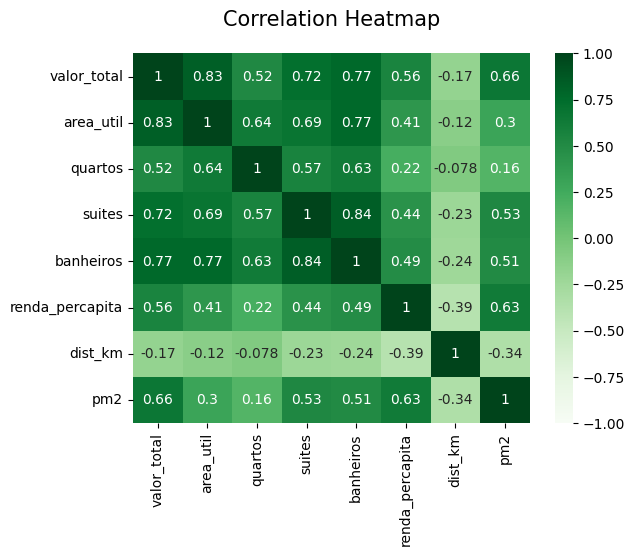

In [40]:
# Mapa de calor para correlação

import seaborn as sns

heatmap = sns.heatmap(df2_quant.corr(), vmin=-1, vmax=1, annot=True, cmap="Greens");
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=20);

<h1 style='color:red'>Plotagem de gráficos</h1>

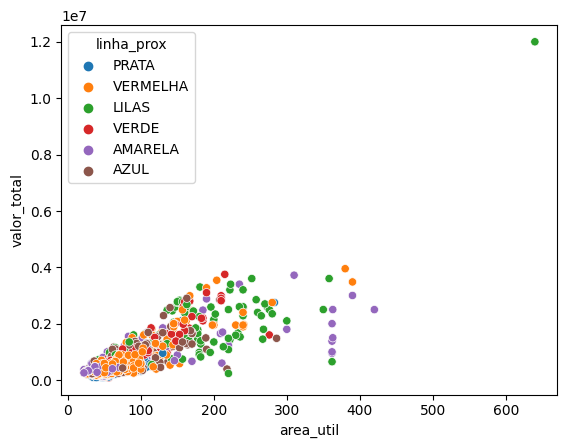

In [41]:
sns.scatterplot(data=df2, x='area_util', y='valor_total', hue='linha_prox');

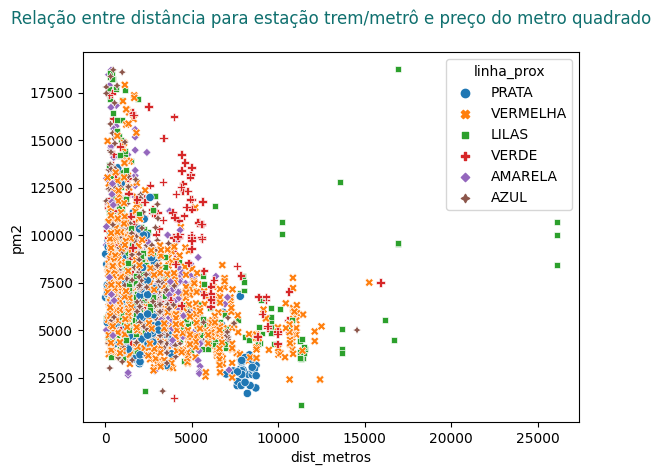

In [42]:
import matplotlib.pyplot as plt

sns.scatterplot(data=df2, x='dist_metros', y='pm2', style='linha_prox', hue='linha_prox')
plt.title("Relação entre distância para estação trem/metrô e preço do metro quadrado", color='#10706f', pad=20);

In [43]:
# fim